# Esercizio 9: TSP - Algoritmo Genetico
Studiamo il problema del commesso viaggiatore su un insieme di città in $\mathbb{R}^n$ con metrica $L^2$.
Le città sono generate in modo casuale o uniformemente in un quadrato oppure uniformemente su un cerchio. I
Successivamente si generano 200 cammini applicando permutazioni random sul vettore che contiene tutte le città. Un cammino è una sequenza ordinata di città.

Dalla popolazione iniziale viene costruita una generazione successiva nel seguente modo:
- evoluzione: Vengono estratte delle coppie di cammini dalla popolazione, premiando i cammini più corti. Questi cammini con probabilità 0.2 vengono promossi alla successiva generazione immutati, con probabilità 0.8 invece produrranno dei figli che presentano parte delle città nell'ordine di uno dei genitori e parte delle città nell'ordine dell'altro. 
- mutazioni: con probabilità 0.1 ogni cammino può andare incontro a ciascuna di queste mutazioni:
    - swap: vengono presi due punti casuali nel cammino e vengono scambiati
    - shift: viene scelta una sotto sequenza contigua nel cammino e scambiata con un'altra sotto sequenza di uguale lunghezza. Si tratta di una generalizzazione dell'operazione di swap che può preservare alcune sequenze ben ottimizzate
    - reverse: viene ribaltata una sottosequenza contigua nel cammino.

In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.style

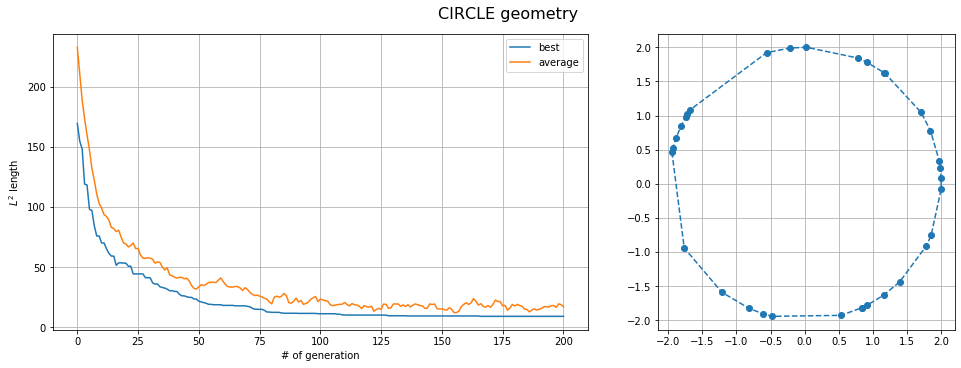

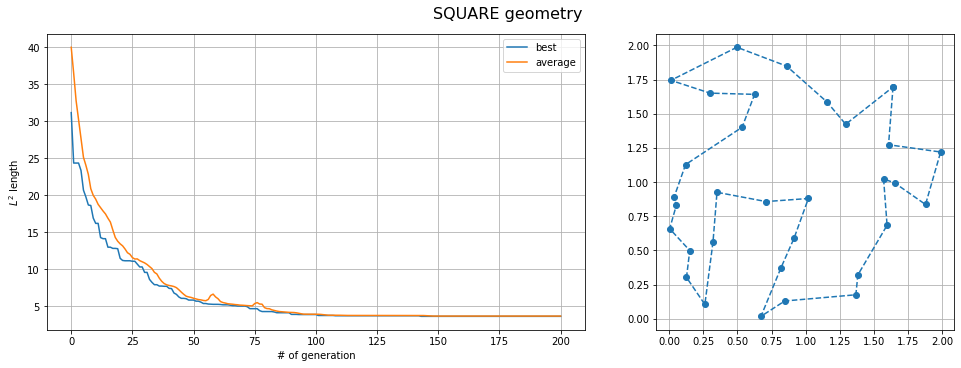

In [12]:
modes = ['CIRCLE', 'SQUARE']
for i_mode, mode in enumerate(modes):
    fig, axs = plt.subplots(1,2, constrained_layout=True, figsize=(14,5), gridspec_kw={'width_ratios': [1.3, 1]})
    fig.suptitle(mode + ' geometry', fontsize = 16)
    best_len, ave_len = np.loadtxt(mode + "_len_best_ave.dat", unpack=True)
    axs[0].plot(range(best_len.size), best_len, label='best')
    axs[0].plot(range(ave_len.size), ave_len, label='average')
    axs[0].set_xlabel('# of generation')
    axs[0].set_ylabel('$L^2$ length')
    axs[0].legend()
    axs[0].grid()

    X, Y = np.loadtxt(mode + '_best_path.dat', unpack=True)
    axs[1].plot(X, Y, '--o')
    axs[1].set_aspect('equal')
    axs[1].grid()

plt.show()

### Nota
Eseguendo il codice variando le probabilità di mutazione si può verificare che se queste sono intorno a 0.1, il processo di ottimizzazione può rimanere intrappolato in minimi locali. Le mutazioni portano disordine nel sistema e questo è necessario per esplorare adeguatamente lo spazio delle fasi su una scala maggiore della larghezza dei minimi locali